<a href="https://colab.research.google.com/github/Lital-Ben-Baruch/IrisClassification/blob/main/PureLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part A - linear regression  

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd # This line imports the pandas library, which is commonly used for data manipulation and analysis.
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

 ### Step 2. Import the dataset from drive
 let's begin the exercise by reading the ex2data1.txt file together. This file contains **three columns** of data, where the first two columns represent the **test scores**, and the third column is a **binary label** that indicates whether the student **passed or failed** the course. We'll use this data for further analysis in the exercise.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The **read_database function** reads a database file, assigns column names to the DataFrame, separates the input features and output labels, and returns the DataFrame, input features, and output labels as the output of the function.

You can use this function to load a database file and obtain the DataFrame, input features, and output labels for further analysis or processing.

In [ ]:
def read_database(file_path):
    # Read the database using pandas without header row
    df = pd.read_csv(file_path, header=None, names=["Test 1", "Test 2", "Score"])

    # Separate the input features (X) and the output labels (y)
    X = df.iloc[:, :-1]  # Assuming the input features are in all but the last column
    y = df.iloc[:, -1]   # Assuming the output labels are in the last column

    return df, X, y

In [ ]:
file_path_A = "/content/drive/My Drive/Summaries _ML_AI_CV/data_sets/Logistic_regression/ex2data1.txt"
df_test, X, y = read_database(file_path_A)

In [ ]:
df_test.head()

,Test 1,Test 2,Score
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Test 1  100 non-null    float64
 1   Test 2  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: Score
Non-Null Count  Dtype
--------------  -----
100 non-null    int64
dtypes: int64(1)
memory usage: 928.0 bytes


 ### Step 3. Scatter plot
 To illustrate the differences between the various groups, make a scatter plot using the variables. The x-axis represents the first exam, the y-axis represents the second exam, and there are two types of values: 0 for not admitted and 1 for admitted.*italicized text*

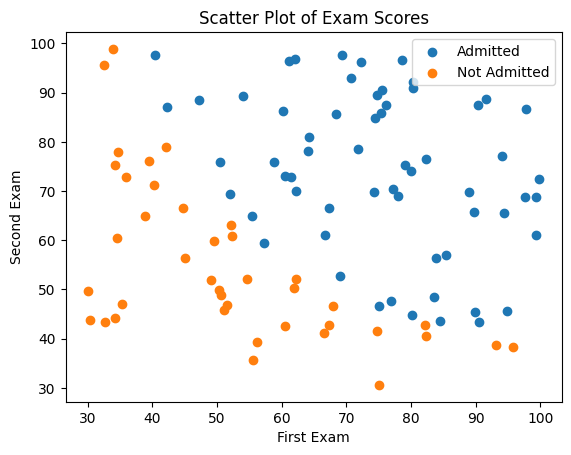

In [ ]:
# Separate the data based on the output labels
df_admitted = df_test[df_test['Score'] == 1]
df_not_admitted = df_test[df_test['Score'] == 0]

# Create a scatter plot
plt.scatter(df_admitted['Test 1'], df_admitted['Test 2'], label='Admitted')
plt.scatter(df_not_admitted['Test 1'], df_not_admitted['Test 2'], label='Not Admitted')

# Set labels and title
plt.xlabel('First Exam')
plt.ylabel('Second Exam')
plt.title('Scatter Plot of Exam Scores')

# Set legend position
plt.legend(loc='upper right')

# Display the plot
plt.show()


 ### Step 3. Create the Sigmoid function
 Create the Sigmoid function, which you'll use later on in the task. The function takes a certain value as input and outputs the sigmoid function's output in response. Draw a picture of the function's graph.
 The sigmoid function is defined as



  \\( \\{sigmoid}(x) = \frac{1}{1 + e^{-x}} \\).


The sigmoid function, also known as the logistic function, is commonly used in logistic regression. It **maps any real-valued number to a value between 0 and 1**.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

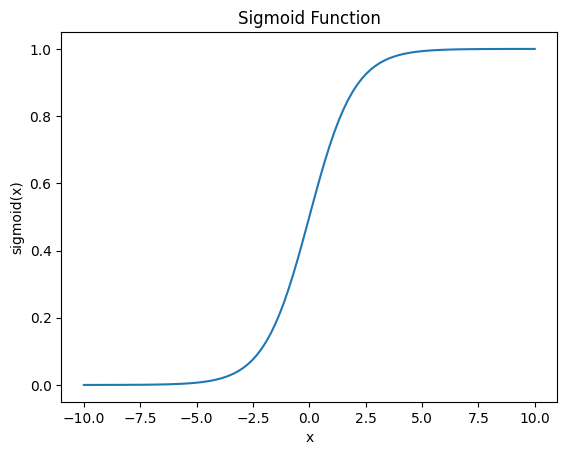

In [ ]:
# Generate values for x
x = np.linspace(-10, 10, 100)

# Compute sigmoid values for corresponding x values
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y)

# Set labels and title
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')

# Display the plot
plt.show()

 ### Step 4. Write a function for logistic regression named CostFunction.
 The dataset (X), the set of weights (theta), and the related labels (Y) are all inputs that the function accepts. In addition to the suitable gradients vector for the updating of the set of weights (theta) supplied to the function, the function will also return the value of the price function that was received.

In [ ]:
def CostFunction (X, theta, y):
    m = len(y)  # Number of training examples

    # Calculate the hypothesis
    h = sigmoid(X.dot(theta))

    # Calculate the cost function
    J = (-1 / m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))

    # Calculate the gradients
    grad = (1 / m) * X.T.dot(h - y)

    return J, grad


  ### Step 5. Create a suitable classifier
  Create a suitable classifier using a learning process on the ex2data1.txt data set based on the CostFunction function. Plot the cost function's value as a function of how each iteration is progressing. What is the decision threshold that you were given? Embed it in the fresh data.

In the following code the train_logistic_regression function is added to iterate over the specified number of iterations, updating the weights using the CostFunction and the provided learning rate. It returns the trained weights theta and the history of cost function values J_history during the training process.

The hyperparameters are set with num_iterations and learning_rate.

The logistic regression classifier is trained by calling the train_logistic_regression function with the input data and hyperparameters. The resulting weights and cost function values are stored in theta and J_history, respectively.

The cost function values over iterations are plotted using matplotlib to observe how the learning process progresses.

Finally, a decision threshold of 0.5 is set, and fresh data is embedded and predicted using the

trained classifier. The predictions are printed to the console.

Note: The assumption is made that the decision threshold is 0.5 for classifying examples as either 0 or 1. You can adjust the threshold value as per your requirements.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cost_function(X, theta, y):
    m = len(y)  # Number of training examples
    h = sigmoid(X.dot(theta))
    epsilon = 1e-8  # Small epsilon value to avoid division by zero or negative logarithm
    J = (-1 / m) * (y.T.dot(np.log(h + epsilon)) + (1 - y).T.dot(np.log(1 - h + epsilon)))
    grad = (1 / m) * X.T.dot(h - y)
    return J, grad


def train_logistic_regression(X, y, num_iterations, learning_rate):
    m, n = X.shape
    theta = np.zeros((n, 1))
    J_history = []

    for iteration in range(num_iterations):
        cost, grad = cost_function(X, theta, y)
        theta -= learning_rate * grad
        J_history.append(cost)

    return theta, J_history

# Separate the input features (X) and the output labels (y)
X = df_test.iloc[:, :-1].values
y = df_test.iloc[:, -1].values.reshape(-1, 1)  # Reshape y

# Add bias column to X
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Set hyperparameters
num_iterations = 5000
learning_rate = 0.001
# Train logistic regression classifier
theta, J_history = train_logistic_regression(X, y, num_iterations, learning_rate)


In [ ]:
len(J_history)

5000

In [ ]:
len(np.squeeze(J_history))

5000

In [ ]:
np.squeeze(J_history)

array([0.69314716, 0.69829066, 0.65971174, ..., 0.60647261, 0.60646813,
       0.60646366])

In [ ]:
df_test

,Test 1,Test 2,Score
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [ ]:
print(f'The optimal thetas we have received are:{theta} \n and the  value of the cost function after the training is: {J_history[-1]}')

The optimal thetas we have received are:[[-0.34165779]
 [ 0.01280173]
 [ 0.00310974]] 
 and the  value of the cost function after the training is: [[0.60646366]]


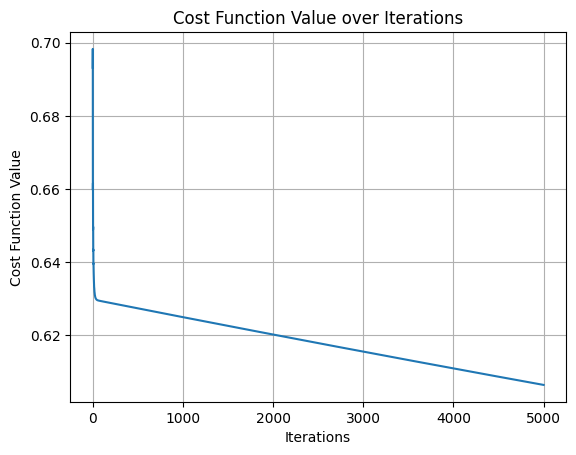

Predictions for fresh data:
Test 1: 32.0, Test 2: 85.0 => Predicted: [1]
Test 1: 60.0, Test 2: 75.0 => Predicted: [1]


In [ ]:
# Plot the cost function value over iterations
plt.plot(range(num_iterations),np.squeeze(J_history))
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function Value over Iterations')
plt.grid(True)
plt.show()

# Decision threshold
threshold = 0.5

# Embed decision threshold in fresh data
fresh_data = np.array([[32, 85], [60, 75]])
fresh_data = np.concatenate((np.ones((fresh_data.shape[0], 1)), fresh_data), axis=1)
predictions = sigmoid(fresh_data.dot(theta))
predictions = np.where(predictions >= threshold, 1, 0)

print("Predictions for fresh data:")
for i in range(fresh_data.shape[0]):
    print(f"Test 1: {fresh_data[i, 1]}, Test 2: {fresh_data[i, 2]} => Predicted: {predictions[i]}")


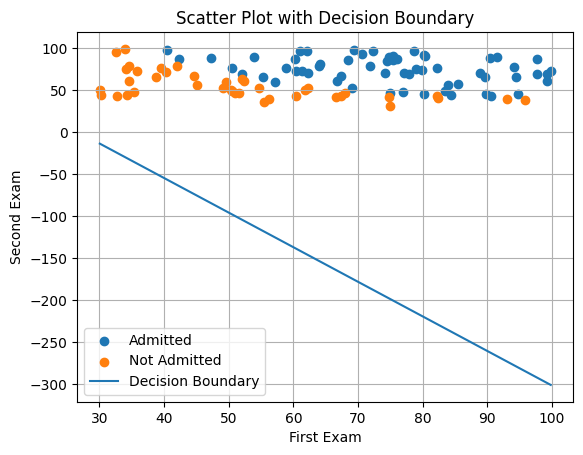

In [ ]:
# Plot the scatter plot of data points
plt.scatter(df_admitted['Test 1'], df_admitted['Test 2'], label='Admitted')
plt.scatter(df_not_admitted['Test 1'], df_not_admitted['Test 2'], label='Not Admitted')

# Plot the decision boundary
x_decision = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_decision = -(theta[0] + theta[1] * x_decision) / theta[2]
plt.plot(x_decision, y_decision, label='Decision Boundary')

# Set labels and title
plt.xlabel('First Exam')
plt.ylabel('Second Exam')
plt.title('Scatter Plot with Decision Boundary')

# Set legend position
plt.legend()
plt.grid()
# Display the plot
plt.show()


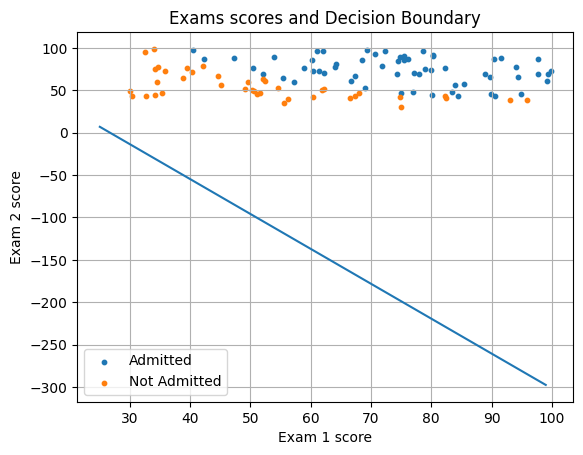

In [ ]:
x_values = np.arange(25,100)
theta_0 = theta[0]
theta_1 = theta[1]
theta_2 = theta[2]
y_values = - (theta_0 + theta_1 * x_values) / theta_2

#plots
plt.figure()

plt.plot(x_values, y_values)

plt.scatter(df_admitted.iloc[:, 0], df_admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(df_not_admitted.iloc[:, 0], df_not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.title('Exams scores and Decision Boundary')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.grid()

As we can see at this point, something is amiss with the algorithm we created after receiving the parameter vector and outputting the decision boundary.  We were informed that using the built-in minimize function from a built-in Python library is acceptable for this task.

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:549: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


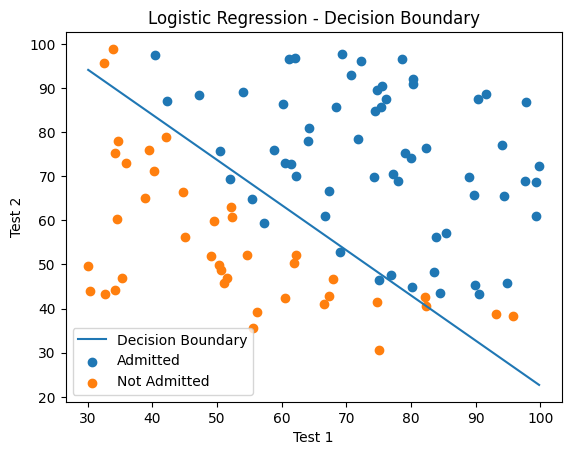

In [ ]:


# Read the dataset using pandas
df = pd.read_csv(file_path_A, header=None, names=["Test 1", "Test 2", "Admitted"])

# Separate the input features (X) and the output labels (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

# Add intercept term to X
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Initialize theta
theta_initial = np.zeros(X.shape[1])

# Define the cost function
def cost_function(theta):
    m = len(y)  # Number of training examples
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    epsilon = 1e-8  # Small epsilon value to avoid division by zero or negative logarithm
    J = (-1 / m) * (y.T.dot(np.log(h + epsilon)) + (1 - y).T.dot(np.log(1 - h + epsilon)))
    return J.item()

# Define the gradient function
def gradient(theta):
    m = len(y)  # Number of training examples
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    grad = (1 / m) * X.T.dot(h - y)
    return grad.flatten()

# Use minimize function to find optimal theta
result = minimize(cost_function, theta_initial, method='Nelder-Mead', jac=gradient)
optimal_theta = result.x.reshape(-1, 1)

# Plot the decision boundary
x_values = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_values = - (optimal_theta[0] + optimal_theta[1] * x_values) / optimal_theta[2]
plt.plot(x_values, y_values, label='Decision Boundary')

# Scatter plot of data points
admitted = df[df['Admitted'] == 1]
not_admitted = df[df['Admitted'] == 0]
plt.scatter(admitted['Test 1'], admitted['Test 2'], label='Admitted')
plt.scatter(not_admitted['Test 1'], not_admitted['Test 2'], label='Not Admitted')

# Set labels, title, and legend
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('Logistic Regression - Decision Boundary')
plt.legend()

# Show the plot
plt.show()


The warning you received is informing you that the Nelder-Mead optimization method does not utilize gradient information. This warning is expected since you provided the gradient function using the `jac` parameter in the `minimize` function call, but it is not used by the Nelder-Mead method.

The Nelder-Mead method is a derivative-free optimization algorithm that does not rely on gradient information. Therefore, you can safely ignore this warning.

If you want to use the gradient information, you can consider using a different optimization method that supports gradients, such as 'BFGS' or 'L-BFGS-B'. These methods may converge faster, especially for large datasets or complex optimization problems.

Here's an updated version of the code that uses the 'L-BFGS-B' method:


In this updated code, I've replaced the 'Nelder-Mead' method with the 'L-BFGS-B' method, which supports gradients. You will no longer see the warning regarding the unused gradient information.

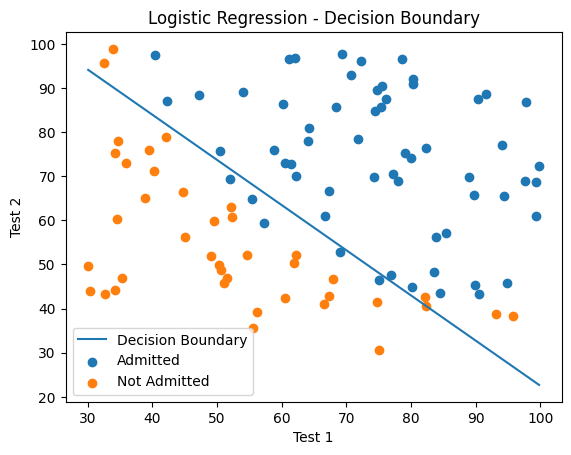

In [ ]:
# Read the dataset using pandas
df = pd.read_csv(file_path_A, header=None, names=["Test 1", "Test 2", "Admitted"])

# Separate the input features (X) and the output labels (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

# Add intercept term to X
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Initialize theta
theta_initial = np.zeros(X.shape[1])

# Define the cost function
def cost_function(theta):
    m = len(y)  # Number of training examples
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    epsilon = 1e-8  # Small epsilon value to avoid division by zero or negative logarithm
    J = (-1 / m) * (y.T.dot(np.log(h + epsilon)) + (1 - y).T.dot(np.log(1 - h + epsilon)))
    return J.item()

# Define the gradient function
def gradient(theta):
    m = len(y)  # Number of training examples
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    grad = (1 / m) * X.T.dot(h - y)
    return grad.flatten()

# Use minimize function to find optimal theta
result = minimize(cost_function, theta_initial, method='L-BFGS-B', jac=gradient)
optimal_theta = result.x.reshape(-1, 1)

# Plot the decision boundary
x_values = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_values = - (optimal_theta[0] + optimal_theta[1] * x_values) / optimal_theta[2]
plt.plot(x_values, y_values, label='Decision Boundary')

# Scatter plot of data points
admitted = df[df['Admitted'] == 1]
not_admitted = df[df['Admitted'] == 0]
plt.scatter(admitted['Test 1'], admitted['Test 2'], label='Admitted')
plt.scatter(not_admitted['Test 1'], not_admitted['Test 2'], label='Not Admitted')

# Set labels, title, and legend
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('Logistic Regression - Decision Boundary')
plt.legend()

# Show the plot
plt.show()


In [ ]:
threshold

0.5

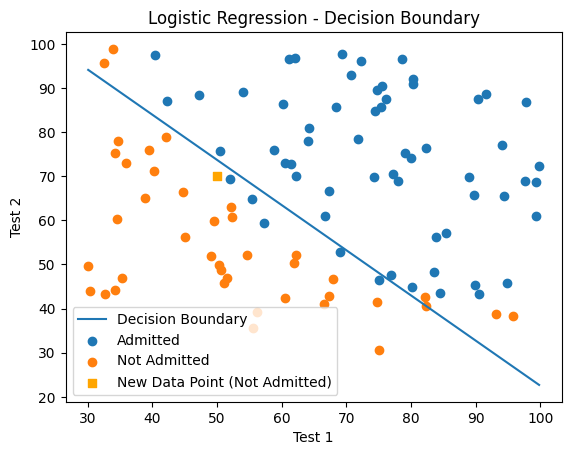

In [ ]:
# Define a function to classify a new data point
def classify_new_data_point(new_data_point, theta):
    new_data_point_with_intercept = np.concatenate(([1], new_data_point))
    predicted_probability = sigmoid(new_data_point_with_intercept.dot(theta))
    if predicted_probability >= threshold: # threshold=0.5 in this case
        return 1
    else:
        return 0

# Plot the decision boundary
plt.plot(x_values, y_values, label='Decision Boundary')

# Scatter plot of data points
plt.scatter(admitted['Test 1'], admitted['Test 2'], label='Admitted')
plt.scatter(not_admitted['Test 1'], not_admitted['Test 2'], label='Not Admitted')

# Classify a new data point
new_data_point = [50, 70]  # Example new data point
classification = classify_new_data_point(new_data_point, optimal_theta)

# Plot the new data point with the appropriate color
if classification == 1:
    plt.scatter(new_data_point[0], new_data_point[1], color='blue', marker='s', label='New Data Point (Admitted)')
else:
    plt.scatter(new_data_point[0], new_data_point[1], color='orange', marker='s', label='New Data Point (Not Admitted)')

# Set labels, title, and legend
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('Logistic Regression - Decision Boundary')
plt.legend()

# Show the plot
plt.show()


### Step 6. Accuracy and performance
Calculate the **accuracy percentage** of the classifier you built on the training set. That is, what percentage of the samples he predicted correctly. Evaluate the nature of the result, how in your opinion the performance of the classifier can be improved (ideas must be given without actual implementation).



In [ ]:
def h_(X, theta):
    # X is a matrix and theta is a vector
    return sigmoid(np.dot(X, theta))

def predict(X, theta):
    probabilities = h_(X, theta)
    predictions = (probabilities >= 0.5).astype(int)
    return predictions

def get_accuracy(X, theta, y):
    predictions = predict(X, theta)
    corrects = np.sum(predictions == y)
    accuracy_percentage = (corrects / len(y)) * 100
    return accuracy_percentage

In [ ]:
print('The accuracy of the test is: %{0}'.format(get_accuracy(X, optimal_theta, y)))

The accuracy of the test is: %89.0



Optimizing logistic regression involves improving its performance in terms of accuracy and efficiency. Here are some additional optimization techniques you can consider:

1. Feature scaling: Normalize or standardize the input features to a similar scale. This can help improve the convergence speed and performance of the optimization algorithm.

2. Regularization: Introduce regularization techniques like L1 or L2 regularization to prevent overfitting and improve the model's generalization ability. Regularization adds a penalty term to the cost function to discourage large parameter values.

3. Advanced optimization algorithms: Instead of using the Nelder-Mead method, you can explore other optimization algorithms such as gradient descent variants (e.g., batch gradient descent, stochastic gradient descent, mini-batch gradient descent) or more advanced methods like BFGS, L-BFGS, or conjugate gradient.

4. Early stopping: Implement early stopping during the training process. Monitor the cost or loss function on a validation set and stop the training when the performance starts to deteriorate. This helps prevent overfitting and improves training efficiency.

5. Feature selection: Perform feature selection to identify the most informative features for the classification task. Removing irrelevant or redundant features can simplify the model and improve its performance.

6. Cross-validation: Utilize cross-validation techniques to assess the performance and generalization ability of the model. This helps in tuning hyperparameters and selecting the best model configuration.

7. Ensemble methods: Explore ensemble methods such as bagging or boosting to combine multiple logistic regression models for improved performance and robustness.

8. Parallelization: If dealing with large datasets, consider parallelizing the computations to leverage multiple processors or distributed computing frameworks. This can significantly speed up the training process.

It's important to note that the effectiveness of these optimization techniques may vary depending on the specific dataset and problem at hand. It's recommended to experiment and evaluate different approaches to find the best optimization strategy for your logistic regression model.

### Step 7. Write a function that can forecast if a new sample (a pair of student grades) will pass or fail a course. Run a few samples and arrange them in relation to the training set samples graphically.

In step 6 a allready created a function `classify_new_data_point` that takes a new data point and the optimal theta as input, and classifies the new data point based on the predicted probability using the logistic regression model.

The code then plots the decision boundary, scatter plots the data points, classifies a new data point (`new_data_point`), and plots the new data point on the graph with the appropriate color and label.

The set labels, title, and legend are also included to provide a clear visualization of the logistic regression decision boundary.

Overall, the code provided accomplishes the task of classifying and plotting a new data point in relation to the training set samples using the logistic regression model.

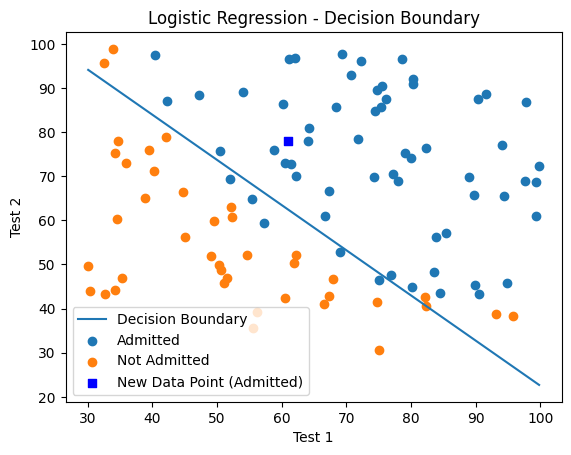

In [ ]:
# Plot the decision boundary
plt.plot(x_values, y_values, label='Decision Boundary')

# Scatter plot of data points
plt.scatter(admitted['Test 1'], admitted['Test 2'], label='Admitted')
plt.scatter(not_admitted['Test 1'], not_admitted['Test 2'], label='Not Admitted')

# Classify a new data point
new_data_point = [61, 78]  # Example new data point
classification = classify_new_data_point(new_data_point, optimal_theta)

# Plot the new data point with the appropriate color
if classification == 1:
    plt.scatter(new_data_point[0], new_data_point[1], color='blue', marker='s', label='New Data Point (Admitted)')
else:
    plt.scatter(new_data_point[0], new_data_point[1], color='orange', marker='s', label='New Data Point (Not Admitted)')

# Set labels, title, and legend
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('Logistic Regression - Decision Boundary')
plt.legend()

# Show the plot
plt.show()

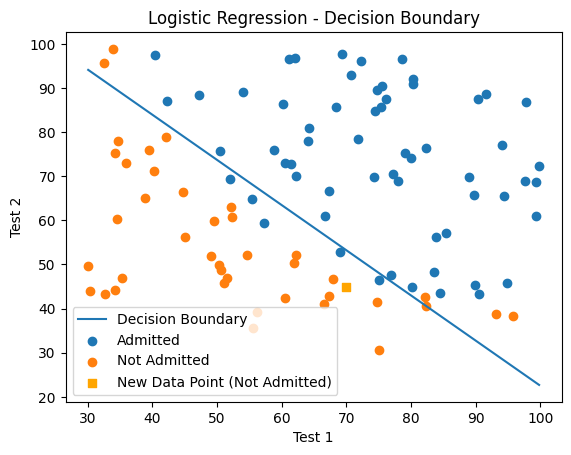

In [ ]:
# Plot the decision boundary
plt.plot(x_values, y_values, label='Decision Boundary')

# Scatter plot of data points
plt.scatter(admitted['Test 1'], admitted['Test 2'], label='Admitted')
plt.scatter(not_admitted['Test 1'], not_admitted['Test 2'], label='Not Admitted')

# Classify a new data point
new_data_point = [70, 45]  # Example new data point
classification = classify_new_data_point(new_data_point, optimal_theta)

# Plot the new data point with the appropriate color
if classification == 1:
    plt.scatter(new_data_point[0], new_data_point[1], color='blue', marker='s', label='New Data Point (Admitted)')
else:
    plt.scatter(new_data_point[0], new_data_point[1], color='orange', marker='s', label='New Data Point (Not Admitted)')

# Set labels, title, and legend
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('Logistic Regression - Decision Boundary')
plt.legend()

# Show the plot
plt.show()

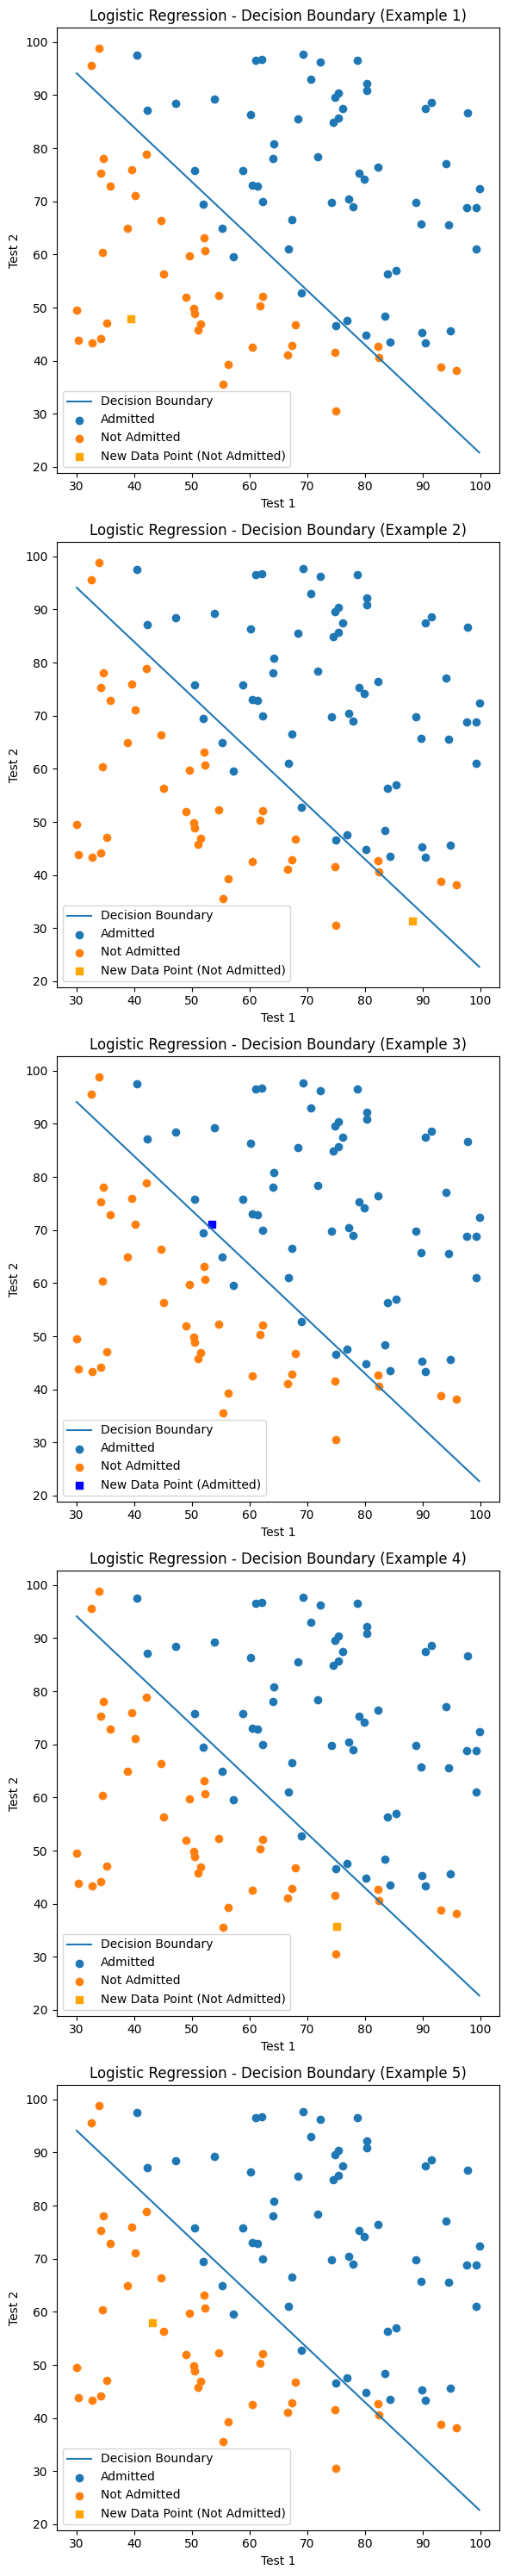

In [ ]:
# Set the number of example data points to generate
num_examples = 5

# Create subplots for multiple plots
fig, axs = plt.subplots(num_examples, 1, figsize=(6, 6*num_examples))

# Generate plots for each example
for i in range(num_examples):
    # Plot the decision boundary
    axs[i].plot(x_values, y_values, label='Decision Boundary')

    # Scatter plot of data points
    axs[i].scatter(admitted['Test 1'], admitted['Test 2'], label='Admitted')
    axs[i].scatter(not_admitted['Test 1'], not_admitted['Test 2'], label='Not Admitted')

    # Generate a new data point
    new_data_point = [np.random.uniform(30, 90), np.random.uniform(30, 90)]

    # Classify the new data point
    classification = classify_new_data_point(new_data_point, optimal_theta)

    # Plot the new data point with the appropriate color
    if classification == 1:
        axs[i].scatter(new_data_point[0], new_data_point[1], color='blue', marker='s',
                       label='New Data Point (Admitted)')
    else:
        axs[i].scatter(new_data_point[0], new_data_point[1], color='orange', marker='s',
                       label='New Data Point (Not Admitted)')

    # Set labels, title, and legend
    axs[i].set_xlabel('Test 1')
    axs[i].set_ylabel('Test 2')
    axs[i].set_title(f'Logistic Regression - Decision Boundary (Example {i+1})')
    axs[i].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()